# Single Track Exploration

This part for My Music Lab is to:
- Load an audio file using librosa
- Visualize waveform and mel-spectrogram
- Extract basic musical features (BPM, chroma)

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

audio_path = "../data/Pretender.mp3"

# read audio
y, sr = librosa.load(audio_path, sr=None)
print("Sampling rate (sr):", sr, "Hz")
print("Number of samples (len(y)):", len(y))
print("Duration:", len(y) / sr, "s")


Sampling rate (sr): 44100 Hz
Number of samples (len(y)): 14396004
Duration: 326.44 s


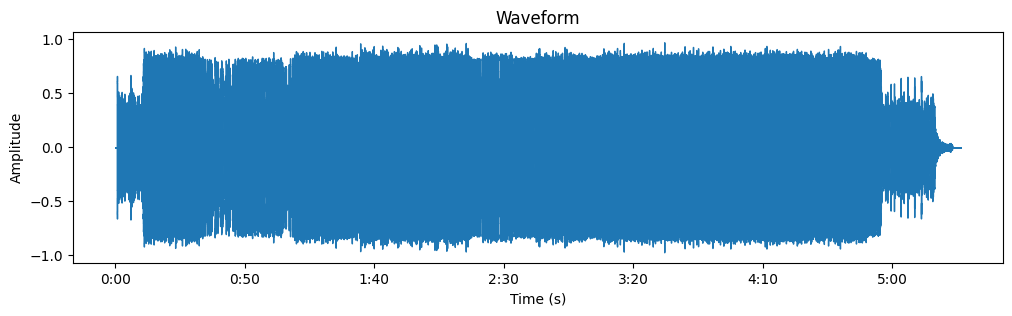

In [2]:
# draw audio wave
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

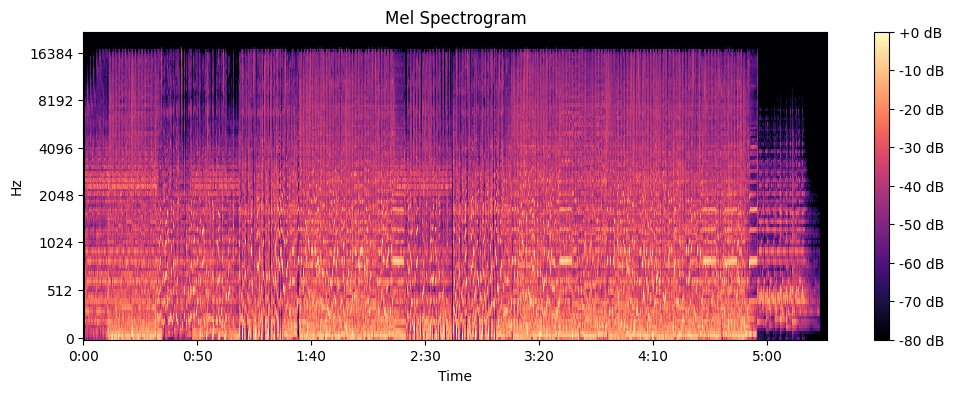

In [3]:
# calculate mel 
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()

Estimated BPM: [92.28515625]


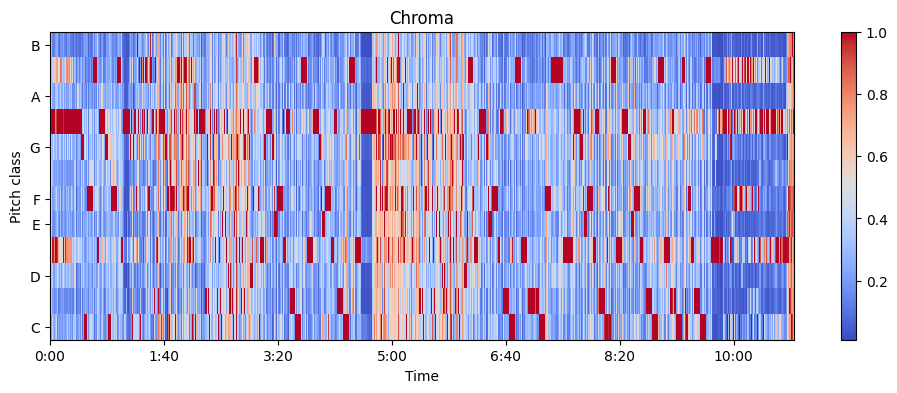

In [4]:
# determine BPM
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print("Estimated BPM:", tempo)

# calculate chroma
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma")
plt.show()